# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

*Nicholas Pham*

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

## **This is a test for one temperature with a smaller box dimension**

In [207]:
#Import all the necessary libraries. This will be updated as the code progresses.

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from random import *

In [235]:
##This is for a one sample temperature right now
#Dimension of system box
n = 10

#System temperature
tau = 2.50
#Create the array
system = np.zeros((n,n))
system0 = np.zeros((n,n))
#Fill the system with random up or down spins
for i in range(n):
    for j in range(n):
        #Uses the floor function to generate 
        system[i,j] = int(1 - 2*np.floor(2*(random())))
        #Save a copy of the old array
        system0[i,j] = system[i,j]

print(system)

[[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
 [-1. -1. -1.  1. -1. -1.  1. -1. -1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1. -1.  1.  1.  1.]
 [-1. -1. -1. -1.  1.  1. -1.  1. -1. -1.]
 [ 1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1. -1.  1. -1.  1.  1.]
 [ 1. -1.  1. -1.  1.  1.  1.  1. -1.  1.]]


In [236]:
#Get energy of the system
def getdeltaenergy(i, j, sys):
    """
    Returns the energy of the [i,j] cell of the matrix
    """
    current_spin = sys[i,j]
    new_spin = -1*current_spin
    current_energy = -1*current_spin*(sys[(i+1)%n,j] + \
                                    sys[(i-1)%n,j] + \
                                    sys[i,(j+1)%n] + \
                                    sys[i,(j-1)%n])
    new_energy = -1*new_spin*(sys[(i+1)%n,j] + \
                                    sys[(i-1)%n,j] + \
                                    sys[i,(j+1)%n] + \
                                    sys[i,(j-1)%n])
    deltaE = new_energy - current_energy
    return deltaE

In [237]:
#Define Number of Steps
N_steps = 20000

#Run through steps
for i in range(N_steps):
    #Get a random point
    x = int(np.floor(n*random()))
    y = int(np.floor(n*random()))
    energydiff = getdeltaenergy(x,y,system)
    if energydiff<0:
        system[x,y] = -1*system[x,y]
        #if i%500 == 0:
        #    print('Favorable\n')
    elif random() < np.exp(-1*energydiff/tau):
        system[x,y] = -1*system[x,y]
        #if i%500 == 0:
        #    print('Got lucky\n')
    #elif== i%500 == 0:
        #print('No go\n')
#Thermal Equilibrated System
print('Old System')
print(system0)
print(' \n \n ')
print('New System')
print(system)

Old System
[[ 1. -1.  1. -1.  1. -1.  1. -1.  1. -1.]
 [-1. -1. -1.  1. -1. -1.  1. -1. -1.  1.]
 [ 1. -1.  1. -1. -1.  1. -1. -1.  1. -1.]
 [ 1. -1.  1. -1.  1.  1. -1.  1.  1.  1.]
 [-1. -1. -1. -1.  1.  1. -1.  1. -1. -1.]
 [ 1. -1. -1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1.  1. -1. -1.  1. -1.  1.  1.  1.  1.]
 [ 1.  1.  1. -1. -1. -1.  1.  1.  1. -1.]
 [-1.  1.  1.  1.  1. -1.  1. -1.  1.  1.]
 [ 1. -1.  1. -1.  1.  1.  1.  1. -1.  1.]]
 
 
 
New System
[[ 1.  1.  1. -1. -1. -1. -1.  1.  1. -1.]
 [ 1.  1.  1. -1. -1. -1. -1. -1.  1.  1.]
 [ 1. -1.  1. -1. -1. -1. -1. -1. -1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1. -1. -1.  1.  1.]
 [-1.  1.  1.  1.  1. -1. -1. -1. -1.  1.]
 [ 1.  1.  1. -1. -1. -1. -1.  1.  1.  1.]]


In [243]:
def magnetization(arr):
    #Input array is the matrix you would like to find the magnetization of.
    #Only works for 2D arrays
    count = 0
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            count += arr[i][j]
    return count

def average(arr):
    """
    Returns the average of the 1d array
    """
    elements = len(arr)
    count = 0.0
    for i in range(len(arr)):
        count += arr[i]
    return count/elements

def recopy(arr1, arr2):
    """
    Copies 2 onto 1. They have to have the same dimensions//
    """
    for i in range(len(arr1)):
        for j in range(len(arr1[0])):
            arr1[i,j] = arr2[i,j]

mag = [magnetization(system)]
for i in range(2000):
    #Get a random point
    x = int(np.floor(n*random()))
    y = int(np.floor(n*random()))
    energydiff = getdeltaenergy(x,y,system)
    if energydiff<0:
        system[x,y] = -1*system[x,y]
        #if i%500 == 0:
        #    print('Favorable\n')
    elif random() < np.exp(-1*energydiff/tau):
        system[x,y] = -1*system[x,y]
    mag.append(magnetization(system))

#print(mag)
print(abs(average(mag)))

80.5557221389


## **Now lets do all the temperatures in the range and maintain box dimensions**

In [246]:
#Constants
n = 10
N_steps_equ = 8000
metro_range = 2000
#Temperature steps
t = np.linspace(1,4,1000)

#Place to store all of the average magnitizations
avg_mag = []

for temp in t:
    #STEP 1: MAKE THE RANDOM ARRAY
    system = np.zeros((n,n))
    #Fill the system with random up or down spins
    for i in range(n):
        for j in range(n):
            #Uses the floor function to generate 
            system[i,j] = int(1 - 2*np.floor(2*(random())))
            
    #STEP 2: EQUILIBRIATE
    for i in range(N_steps_equ):
        #Get a random point
        x = int(np.floor(n*random()))
        y = int(np.floor(n*random()))
        energydiff = getdeltaenergy(x,y,system)
        if energydiff<0:
            system[x,y] = -1*system[x,y]
        elif random() < np.exp(-1*energydiff/temp):
            system[x,y] = -1*system[x,y]
        
    #STEP 3: DO MCMC METROPOLIS
    mag = [magnetization(system)]
    for i in range(metro_range):
        #Get a random point
        x = int(np.floor(n*random()))
        y = int(np.floor(n*random()))
        energydiff = getdeltaenergy(x,y,system)
        if energydiff<0:
            system[x,y] = -1*system[x,y]
        elif random() < np.exp(-1*energydiff/temp):
            system[x,y] = -1*system[x,y]
            mag.append(magnetization(system))
    avg_mag.append(abs(average(mag)))


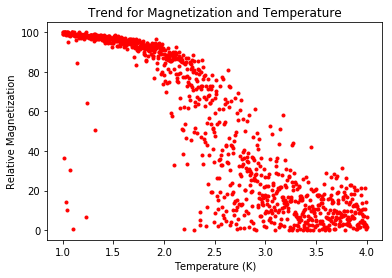

In [248]:
plt.plot(t,avg_mag, 'r.')
plt.title('Trend for Magnetization and Temperature')
plt.xlabel('Temperature (K)')
plt.ylabel('Relative Magnetization')
plt.show()

This plot does not look as intended. It follows the same general curve, but after about 2.25, there is a large amount of disorder. There are a few outliers near the beginning of the plot.